In [12]:
import requests , time 
import pandas as pd
from datetime import datetime
def datetotime(date):
  time_tuple=date.timetuple()
  timestamp=round(time.mktime (time_tuple))
  return timestamp
start=datetotime(datetime(2019,1,1))
end =datetotime(datetime.today())




In [13]:
url="https://priceapi.moneycontrol.com/techCharts/history?symbol=23&resolution=15&from="+str(start)+"&to=" +str(end)

In [14]:
url

'https://priceapi.moneycontrol.com/techCharts/history?symbol=23&resolution=15&from=1546281000&to=1663236882'

In [16]:
resp =requests.get(url).json()


In [17]:
data =pd.DataFrame(resp) 
def timetodate(timestamp):
  return datetime.fromtimestamp(timestamp)
data["date"] = data["t"].apply (lambda x : timetodate(x))
data.drop (["t","s"],axis=1,inplace=True)
data.rename(columns={'o':"open",'h':'high','l':'low','c':'close','v':'volume'},inplace=True)
data.index=data["date"]

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2022-09-15 15:47:01.626160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-15 15:47:08.088535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-15 15:47:08.088653: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-15 15:47:08.684141: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-15 15:47:21.250857: W tensorflow/stream_executor/platform/de

2.10.0


In [19]:
data

,open,high,low,close,volume,date
date,,,,,,
2021-09-15 09:15:00,36543.55,36620.50,36498.95,36542.65,0,2021-09-15 09:15:00
2021-09-15 09:30:00,36541.30,36608.00,36541.30,36573.45,0,2021-09-15 09:30:00
2021-09-15 09:45:00,36571.65,36600.30,36549.70,36594.65,0,2021-09-15 09:45:00
2021-09-15 10:00:00,36597.80,36648.65,36592.10,36617.90,0,2021-09-15 10:00:00
2021-09-15 10:15:00,36618.25,36655.95,36584.95,36613.20,0,2021-09-15 10:15:00
...,...,...,...,...,...,...
2022-09-15 14:30:00,41406.95,41521.15,41402.50,41467.00,0,2022-09-15 14:30:00
2022-09-15 14:45:00,41465.15,41465.15,41313.35,41313.35,0,2022-09-15 14:45:00
2022-09-15 15:00:00,41310.90,41330.90,41168.70,41203.50,0,2022-09-15 15:00:00


In [20]:
dataset = data.copy()
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('close')
test_labels = test_features.pop('close')

In [21]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [22]:
train_features.drop("date",axis=1,inplace=True)
train_features=np.asarray(train_features).astype('float32')
train_labels=np.asarray(train_labels).astype('float32')

In [23]:
normalizer.adapt(np.array(train_features))

2022-09-15 15:47:37.016872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-15 15:47:37.026740: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-15 15:47:37.026892: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pavan-HP-15-Notebook-PC): /proc/driver/nvidia/version does not exist
2022-09-15 15:47:37.043670: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [25]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,586
Trainable params: 4,577
Non-trainable params: 9
______________________________________________________

In [26]:
test_features.drop("date",axis=1,inplace=True)
test_features=np.asarray(test_features).astype('float32')
test_labels=np.asarray(test_labels).astype('float32')

In [27]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 54.4 s, sys: 4.69 s, total: 59 s
Wall time: 38.6 s


In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [close]')
  plt.legend()
  plt.grid(True)

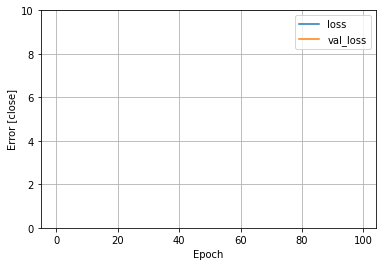

In [29]:
plot_loss(history)

In [30]:
test_predictions = dnn_model.predict(test_features).flatten()

41/41 [==============================] - 0s 2ms/step


In [31]:
len(test_predictions)

1294

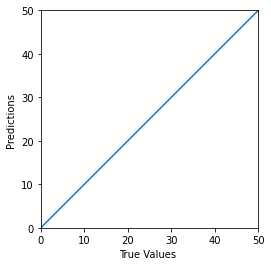

In [32]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [33]:
dnn_model.predict(train_features)

162/162 [==============================] - 0s 2ms/step


array([[37781.21 ],
       [36348.062],
       [39380.09 ],
       ...,
       [38642.62 ],
       [38023.01 ],
       [38586.98 ]], dtype=float32)

array([[37907.4 , 38120.55, 37906.8 ,     0.  ],
       [36338.05, 36364.7 , 36251.35,     0.  ],
       [39046.4 , 39148.35, 39043.9 ,     0.  ],
       ...,
       [38598.1 , 38607.8 , 38535.1 ,     0.  ],
       [36972.8 , 37051.35, 36884.85,     0.  ],
       [37880.  , 37917.35, 37840.55,     0.  ]], dtype=float32)

In [40]:
t=dataset.iloc[-5:,]

In [41]:
test=t.copy()

In [42]:
test

,open,high,low,close,volume,date
date,,,,,,
2022-09-15 14:30:00,41406.95,41521.15,41402.50,41467.00,0,2022-09-15 14:30:00
2022-09-15 14:45:00,41465.15,41465.15,41313.35,41313.35,0,2022-09-15 14:45:00
2022-09-15 15:00:00,41310.90,41330.90,41168.70,41203.50,0,2022-09-15 15:00:00
2022-09-15 15:15:00,41200.35,41227.90,41167.00,41208.45,0,2022-09-15 15:15:00
2022-09-15 15:30:00,41199.00,41199.00,41199.00,41199.00,0,2022-09-15 15:30:00


In [43]:
test.drop(["date","close"],axis=1,inplace=True)
test=np.asarray(test).astype('float32')

In [38]:
test=

array([[41406.95, 41521.15, 41402.5 , 41467.  ,     0.  ],
       [41465.15, 41465.15, 41313.35, 41313.35,     0.  ],
       [41310.9 , 41330.9 , 41168.7 , 41203.5 ,     0.  ],
       [41200.35, 41227.9 , 41167.  , 41208.45,     0.  ],
       [41199.  , 41199.  , 41199.  , 41199.  ,     0.  ]], dtype=float32)

In [44]:
dnn_model.predict(test)

1/1 [==============================] - 0s 32ms/step


array([[41478.348],
       [41323.53 ],
       [41194.72 ],
       [41179.44 ],
       [41182.63 ]], dtype=float32)